<>:16: SyntaxWarning: invalid escape sequence '\C'
<>:16: SyntaxWarning: invalid escape sequence '\C'
C:\Users\hp\AppData\Local\Temp\ipykernel_1776\189380722.py:16: SyntaxWarning: invalid escape sequence '\C'
  seqs, quals = Readfastq("F:\Coursera\Algorithms for DNA sequences\ERR037900_1.first1000.fastq") #Give Path to your file as an argument including file name and extension


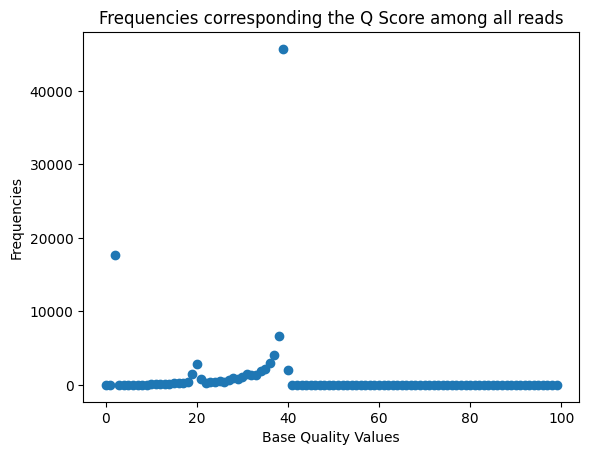

In [2]:
def Readfastq(filename):
    sequences = []
    qualities = []
    with open(filename) as f:
        while True:
            f.readline()                #ignore first line of a read i.e., Name
            seq = f.readline().rstrip() # removes white space while reading only add sequence
            f.readline()                #ignore third line of a read i.e., placeholder strand (+ or -)
            qual = f.readline().rstrip() # removes white space while reading only add ASCII encoded Quality Value
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

seqs, quals = Readfastq("F:\Coursera\Algorithms for DNA sequences\ERR037900_1.first1000.fastq") #Give Path to your file as an argument including file name and extension


def Phred33_to_Q(qual):
    return ord(qual) - 33       #Convert character into ASCII Value and substract with 33 to obtain the Q score


def CreateHist(qualities):      # Make histograms of a quality values
    hist = [0] * 100
    for qual in qualities:
        for Phred in qual:
            q = Phred33_to_Q(Phred)
            hist[q] += 1        #increatment the index number resulting from Phred33_to_Q function above

    return hist
h = CreateHist(quals)


import matplotlib.pyplot as plt     #plot bar chart of histogram
plt.title("Frequencies corresponding the Q Score among all reads")
plt.xlabel("Base Quality Values")
plt.ylabel("Frequencies")
plt.scatter(range(len(h)), h)       #You can change the type of chart from scatter to bar and etc.
plt.show()




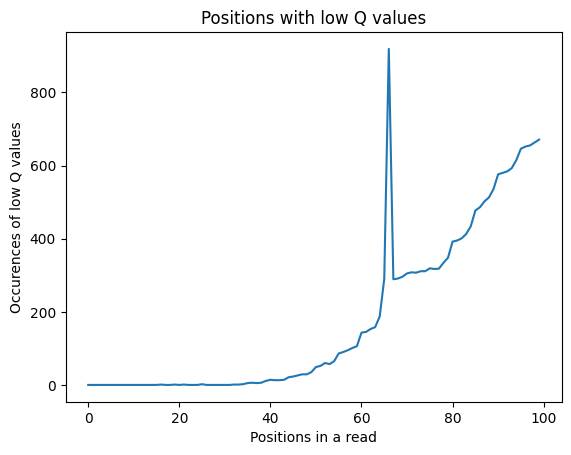

66


In [3]:
def FindbadSeqCycle(quals):
    """Finds position in a read with highest frequency of low Q value"""
    low_Q_pos = [0] * 100           #initialize all the positions of length of Qvalues to 0
    for qual in quals:              #loop through the Q-score list of each read
        for i in range(len(qual)):  #loop through all the positions in Q-score list
            q = Phred33_to_Q(qual[i])
            if q < 10:               #identified from the histogram above(range for most frequent minimum Q values) Customize as per your results
                low_Q_pos[i] += 1   #creats a lists of positions having low Q value
    
    plt.plot(range(len(low_Q_pos)), low_Q_pos)  #plots number of occurences of defined low Q values with their positions on the read
    plt.xlabel("Positions in a read")
    plt.ylabel("Occurences of low Q values")
    plt.title("Positions with low Q values")
    plt.show() 

    for i in range(len(low_Q_pos)):     #loop through lists of positions with low Q values
        if low_Q_pos[i] == max(low_Q_pos): #find the position with highest occurenece of low Q values
            return i
        
Bad_Cycle = FindbadSeqCycle(quals)
print(Bad_Cycle)


In [ ]:
def findGCByPos(reads):
    gc = [0] * 100                        # Creates a list of integer value 0 upto the length of 100 (length of the seq reads) to store occurence of "G" or "C" at position with in 100.
    totals = [0] * 100                    # Creates a list of integer value 0 upto the length of 100 (length of the seq reads) to store each occurence of any base at position with in 100.

    for read in reads:                   #loop through all the reads in a FastQ file
        for i in range(len(read)):       #loop through each index in a read
            if read[i] == "G" or read[i] == "C": #Conditional statement for "G" or "C"
                gc[i] += 1                 #increament the value at index i (position)
            totals[i] += 1                 #increament the value at index i (position)

    for i in range(len(gc)):                #loop through the gc list generted from all the reads
        if totals[i] > 0:                   #conditional statement to avoid Divided by Zero error
            gc[i] /= float(totals[i])       # Obtain the gc ratio at i position relative to the total bases at i position 
    return gc
gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.xlabel("Positions in a read")
plt.ylabel("GC content ratio")
plt.title("Average GC content among all reads")
plt.show() 


Counter({'C': 29665, 'A': 24057, 'G': 22888, 'T': 22476, 'N': 914})


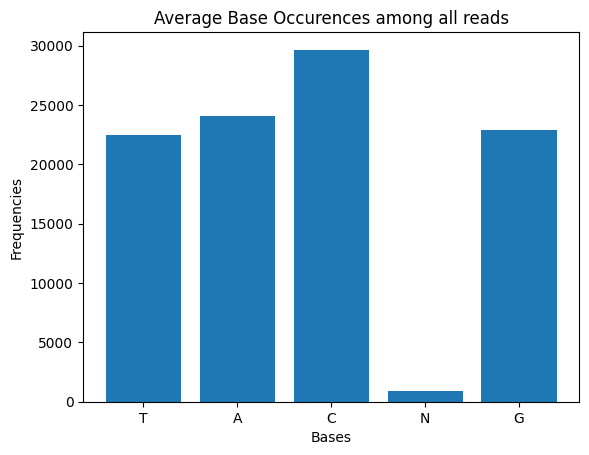

In [3]:
import collections
count = collections.Counter()

for seq in seqs: #Counts the frequencies of all bases among all reads
    count.update(seq)
print(count)
Base_dict = dict(count)
plt.bar(Base_dict.keys(), Base_dict.values())
plt.xlabel("Bases")
plt.ylabel("Frequencies")
plt.title("Average Base Occurences among all reads")
plt.show()
